In [65]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

## Data Analysis

In [392]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
train = pd.concat([x_train, y_train], axis=1)
test = pd.read_csv('x_test.csv')
train.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,ID,RET
0,0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,...,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,0,True
1,1,0,3,43,15,6,104,0.003984,NaN,-0.090580,...,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN,1,True
2,2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,...,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,2,False
3,3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,...,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,3,False
4,4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,...,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,4,False


In [53]:
print(x_train.shape[0])
print(x_train.shape[1])

418595
46


In [399]:
train=train.dropna()
test=test.dropna()

In [401]:
colstrain = [f'RET_{i}' for i in range(1, 21)] 
train['Ma20'] = train[colstrain].mean(axis=1)

coltest=[f'RET_{i}' for i in range(1,21)]
test['Ma20']= test[coltest].mean(axis=1)

train['Ma5']=train[[f'RET_{i}' for i in range(1,6)]].mean(axis=1)

train['V5']=train[[f'RET_{i}' for i in range(1,6)]].std(axis=1)

train['V20']=train[[f'RET_{i}' for i in range(1,21)]].std(axis=1)

train['RET'] = LabelEncoder().fit_transform(train['RET'])

train.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_19,VOLUME_19,RET_20,VOLUME_20,ID,RET,Ma20,Ma5,V5,V20
0,0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,...,-0.012959,0.174521,-0.002155,-0.000937,0,1,0.016318,-0.003694,0.016027,0.054646
2,2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,...,-0.012101,-0.356157,-0.006867,-0.308868,2,0,-0.001043,-0.006658,0.031757,0.023417
3,3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,...,-0.013520,-0.562126,-0.036745,-0.631458,3,0,-0.003154,0.003658,0.018668,0.020831
4,4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,...,0.004256,0.579510,-0.040817,0.802806,4,0,-0.003551,0.002059,0.026294,0.032045
5,5,0,23,37,12,5,94,0.010938,-0.238878,0.021548,...,0.032527,0.665084,0.008400,-0.037627,5,0,0.001894,-0.003738,0.019824,0.018493


In [192]:
print(train['SECTOR'].value_counts())

SECTOR
7     65223
8     51244
4     48370
3     41273
6     40194
1     16377
2     14850
5     13681
10    11220
0      4627
9      4084
11     3017
Name: count, dtype: int64


In [194]:
print(train['INDUSTRY'].value_counts())

INDUSTRY
46    21344
53    12698
43    11952
52    11800
57    11003
      ...  
19      498
51      489
74      309
61      240
21       45
Name: count, Length: 72, dtype: int64


In [196]:
print(train['INDUSTRY_GROUP'].value_counts())

INDUSTRY_GROUP
16    27694
3     25865
20    23833
15    20864
14    19330
21    17210
1     16377
10    15399
2     14850
19    13711
17    12018
18    11800
25    11220
8     10752
7     10429
22    10201
4      9326
9      8640
12     7785
5      6082
0      4627
23     4084
6      3150
26     3017
13     2972
11     2924
Name: count, dtype: int64


In [403]:
train['Sector_Ma20'] = train.groupby('SECTOR')['Ma20'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
train['Ind_Ma20'] = train.groupby('INDUSTRY')['Ma20'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
train['IndGroup_Ma20'] = train.groupby('INDUSTRY_GROUP')['Ma20'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
train['Ind_Ma5'] = train.groupby('INDUSTRY')['V20'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

train.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,ID,RET,Ma20,Ma5,V5,V20,Sector_Ma20,Ind_Ma20,IndGroup_Ma20,Ind_Ma5
0,0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,...,0,1,0.016318,-0.003694,0.016027,0.054646,0.016318,0.016318,0.016318,0.054646
2,2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,...,2,0,-0.001043,-0.006658,0.031757,0.023417,-0.001043,-0.001043,-0.001043,0.023417
3,3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,...,3,0,-0.003154,0.003658,0.018668,0.020831,-0.003154,-0.003154,-0.003154,0.020831
4,4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,...,4,0,-0.003551,0.002059,0.026294,0.032045,-0.003551,-0.003551,-0.003551,0.032045
5,5,0,23,37,12,5,94,0.010938,-0.238878,0.021548,...,5,0,0.001894,-0.003738,0.019824,0.018493,-0.000829,0.001894,-0.000829,0.018493


In [405]:
train = train.drop(['ID','STOCK', 'DATE','INDUSTRY','INDUSTRY_GROUP','SECTOR','SUB_INDUSTRY'], axis = 1) 
test=test.drop(['ID','STOCK', 'DATE','INDUSTRY','INDUSTRY_GROUP','SECTOR','SUB_INDUSTRY'],axis=1)

In [407]:
train.head()

,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,...,VOLUME_20,RET,Ma20,Ma5,V5,V20,Sector_Ma20,Ind_Ma20,IndGroup_Ma20,Ind_Ma5
0,-0.015748,0.147931,-0.015504,0.179183,0.010972,0.033832,-0.014672,-0.362868,0.016483,-0.972920,...,-0.000937,1,0.016318,-0.003694,0.016027,0.054646,0.016318,0.016318,0.016318,0.054646
2,0.000440,-0.096282,-0.058896,0.084771,-0.009042,-0.298777,0.024852,-0.157421,0.009354,0.091455,...,-0.308868,0,-0.001043,-0.006658,0.031757,0.023417,-0.001043,-0.001043,-0.001043,0.023417
3,0.031298,-0.429540,0.007756,-0.089919,-0.004632,-0.639737,-0.019677,-0.940163,0.003544,-0.882464,...,-0.631458,0,-0.003154,0.003658,0.018668,0.020831,-0.003154,-0.003154,-0.003154,0.020831
4,0.027273,-0.847155,-0.039302,-0.943033,0.000000,-1.180629,0.000000,-1.313896,0.022321,-1.204398,...,0.802806,0,-0.003551,0.002059,0.026294,0.032045,-0.003551,-0.003551,-0.003551,0.032045
5,0.010938,-0.238878,0.021548,-0.322706,-0.016097,0.747003,-0.027120,0.688104,-0.007958,-0.182443,...,-0.037627,0,0.001894,-0.003738,0.019824,0.018493,-0.000829,0.001894,-0.000829,0.018493


In [206]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc
from sklearn import tree,metrics

In [208]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import numpy as np
import pandas as pd
#import xgboost as xgb
#from xgboost import XGBClassifier

## Evaluation Functions

In [409]:
def modelfit(model,X,Y,features, performCV=True,roc=False, printFeatureImportance=False):
    
    #Fitting the model on the data_set
    model.fit(X[features],Y)
        
    #Predict training set:
    predictions = model.predict(X[features])
    predprob = model.predict_proba(X[features])[:,1]
    
    # Create and print confusion matrix    
    cfm = confusion_matrix(Y,predictions)
    print("\nModel Confusion matrix")
    print(cfm)
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(Y.values, predictions))
    
    #Perform cross-validation: evaluate using 10-fold cross validation 
    #kfold = StratifiedKFold(n_splits=10, shuffle=True)
    kfold = 2
    if performCV:
        evaluation(model,X[features],Y,kfold)
    if roc: 
        compute_roc(Y, predictions, plot=True)
          
    #Print Feature Importance:
    if printFeatureImportance:
        feature_importance(model,features,selection=False) 

In [382]:
def evaluation(model,X,Y,kfold):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    scores2 = cross_val_score(model, X, Y, cv=kfold, scoring='precision')
    scores3 = cross_val_score(model, X, Y, cv=kfold, scoring='recall')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.5f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.5f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.5f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    return  

In [384]:
def compute_roc(Y, y_pred, plot=True):
    fpr = dict()
    tpr = dict()
    auc_score = dict()
    fpr, tpr, _ = roc_curve(Y, y_pred)
    auc_score = auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        plt.legend(loc="upper right")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.show()
    return fpr, tpr, auc_score

In [466]:
def feature_importance(model,features,selection=False): 

    importance=pd.DataFrame(model.feature_importances_ )    
    data=pd.DataFrame(data={'Values': model.feature_importances_ ,'Features':features})
    data=data.sort_values(by="Values",ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(data["Features"], data["Values"], color="blue")
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.title("Feature Importance in Descending Order")
    plt.tight_layout()

    if selection:
        threshold=0.02
        filt=data[data["Values"] > threshold]["Features"].tolist()
        print(filt)
    
    #plt.show()
    return plt

### Decision Tree approach

In [411]:
x_traina, x_testa, y_traina, y_testa = train_test_split(train.loc[:, train.columns != 'RET'], train.RET, test_size=0.25, random_state =0)

features=[x for x in train.columns if x not in ['RET']]
model = tree.DecisionTreeClassifier()
modelfit(model,x_traina, y_traina, features, performCV=False)
print("Accuracy on test set :{:.3f} ".format(model.score(x_testa, y_testa)))


Model Confusion matrix
[[117988      0]
 [     0 117632]]

Model Report
Accuracy : 1
Accuracy on test set :0.512 


In [413]:
print('Decision tree with Classifier')
params={'max_depth': np.arange(5, 10),'criterion':['gini','entropy']}
tree_estimator = tree.DecisionTreeClassifier()

grid_tree = GridSearchCV(tree_estimator, params, cv=3, scoring="accuracy",
                         n_jobs=1,
                         verbose=True)

grid_tree.fit(x_traina, y_traina)
best_est = grid_tree.best_estimator_
print(best_est)
print(grid_tree.best_score_)


# summarize results
print("Best: %f using %s" % (grid_tree.best_score_, grid_tree.best_params_))
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
params = grid_tree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Decision tree with Classifier
Fitting 3 folds for each of 10 candidates, totalling 30 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9)
0.5206816059757237
Best: 0.520682 using {'criterion': 'entropy', 'max_depth': 9}
0.519018 (0.001291) with: {'criterion': 'gini', 'max_depth': 5}
0.519459 (0.000474) with: {'criterion': 'gini', 'max_depth': 6}
0.519608 (0.001773) with: {'criterion': 'gini', 'max_depth': 7}
0.519816 (0.001351) with: {'criterion': 'gini', 'max_depth': 8}
0.520117 (0.000803) with: {'criterion': 'gini', 'max_depth': 9}
0.518882 (0.001229) with: {'criterion': 'entropy', 'max_depth': 5}
0.519264 (0.000187) with: {'criterion': 'entropy', 'max_depth': 6}
0.520100 (0.001129) with: {'criterion': 'entropy', 'max_depth': 7}
0.520194 (0.001443) with: {'criterion': 'entropy', 'max_depth': 8}
0.520682 (0.001083) with: {'criterion': 'entropy', 'max_depth': 9}


In [438]:
model = tree.DecisionTreeClassifier(max_depth = 6,criterion='gini')
modelfit(model,x_traina, y_traina,features,printFeatureImportance=False)


Model Confusion matrix
[[76782 41206]
 [69624 48008]]

Model Report
Accuracy : 0.5296
Cross Validation Accuracy: 0.51896 (+/- 0.00)
Cross Validation Precision: 0.52449 (+/- 0.00)
Cross Validation Recall: 0.38987 (+/- 0.02)


['V20', 'RET_1', 'Ind_Ma20', 'VOLUME_1', 'RET_7', 'RET_17', 'VOLUME_7', 'VOLUME_18', 'IndGroup_Ma20', 'RET_4', 'RET_8', 'VOLUME_12', 'VOLUME_3', 'RET_20', 'RET_5', 'RET_3', 'VOLUME_13', 'RET_11', 'RET_16']


<module 'matplotlib.pyplot' from 'C:\\Users\\silvi\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

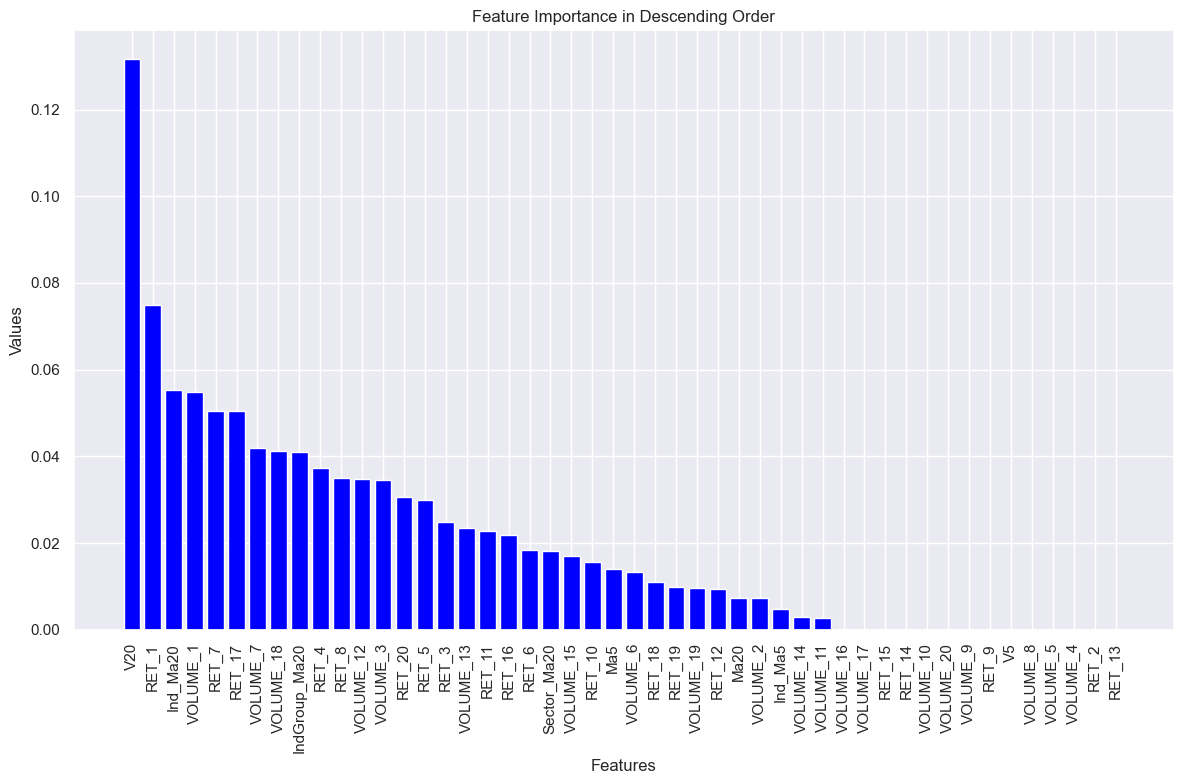

In [470]:
feature_importance(model,features,selection=True)

In [472]:
New_Features=['V20', 'RET_1', 'Ind_Ma20', 'VOLUME_1', 'RET_7', 'RET_17', 'VOLUME_7', 'VOLUME_18', 'IndGroup_Ma20', 'RET_4', 'RET_8', 'VOLUME_12', 'VOLUME_3', 'RET_20', 'RET_5', 'RET_3', 'VOLUME_13', 'RET_11', 'RET_16']

In [476]:
print(New_Features)

['V20', 'RET_1', 'Ind_Ma20', 'VOLUME_1', 'RET_7', 'RET_17', 'VOLUME_7', 'VOLUME_18', 'IndGroup_Ma20', 'RET_4', 'RET_8', 'VOLUME_12', 'VOLUME_3', 'RET_20', 'RET_5', 'RET_3', 'VOLUME_13', 'RET_11', 'RET_16']



Model Confusion matrix
[[60954 57034]
 [54697 62935]]

Model Report
Accuracy : 0.5258
Cross Validation Accuracy: 0.51881 (+/- 0.00)
Cross Validation Precision: 0.51873 (+/- 0.00)
Cross Validation Recall: 0.50059 (+/- 0.00)


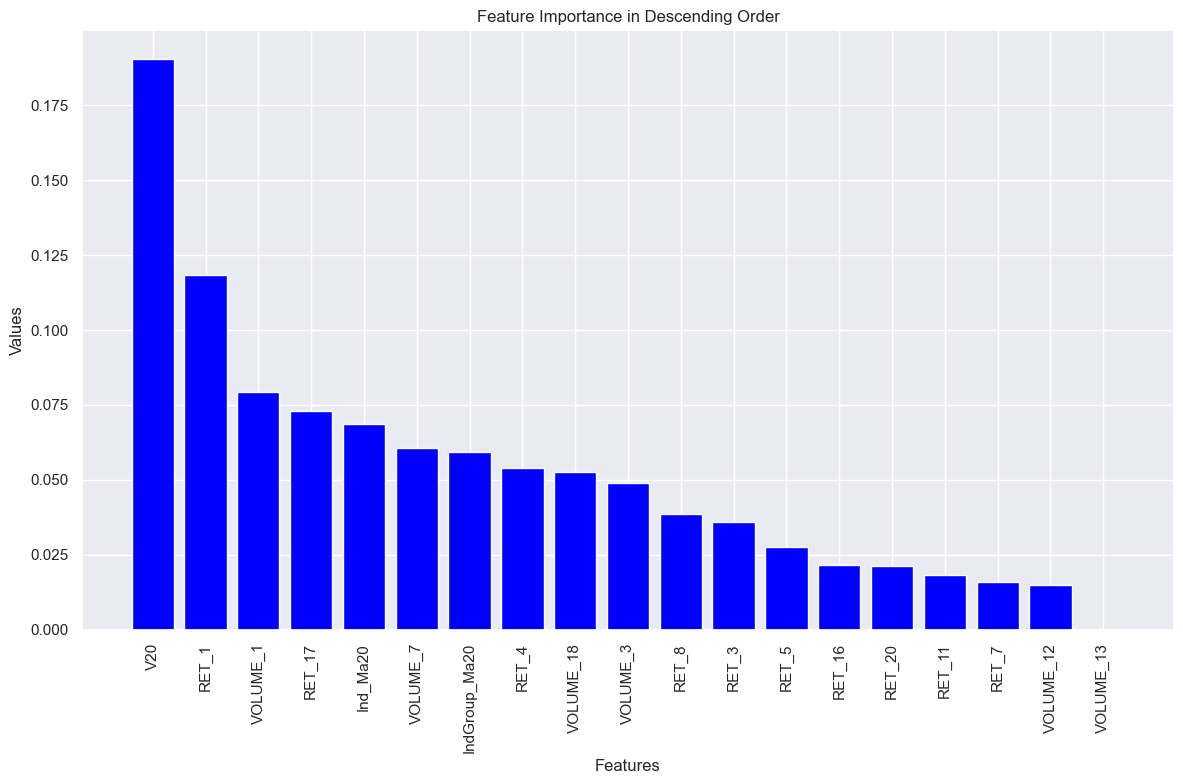

In [490]:
x_train_sl, x_test_sl, y_train_sl, y_test_sl = train_test_split(train.loc[:, train[New_Features].columns], train.RET, random_state =0)
model = tree.DecisionTreeClassifier(max_depth = 5,criterion='gini')
modelfit(model,x_train_sl, y_train_sl,New_Features,printFeatureImportance=True)

In [ ]:
ni